In [1]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os, pathlib, shutil, random

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, Input, Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, AveragePooling2D, TextVectorization
from tensorflow.keras.layers import Dense, Flatten, Softmax, Dropout, Embedding, SimpleRNN, LSTM, GRU, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
# โหลดไฟล์ spam sms
f = open('sms_fi.txt', 'r', encoding='utf-8')
content = f.read()
print(content)
f.close()

คุณได้รับสิทธิ์ยื่น ขอGSBออมสิน60,000คลิ๊ก:bit.ly/3bHrM30
คุณได้รับเงินช่วยเหลือ 24500 สมัคร cutt.ly/VKovS5j เพื่อรับ
ดอกเบี้ยเฉลี่ย 10,000 ละ 3.5 บาทต่อวันท https://bit.ly/34SkGIx
ยื่นขอสินเชื่อGSBออมสิน60,000คลิ๊ก:rb.gy/lwqjk9
คุณได้สินเชื่อประชารัฐกู้ดอกเบี้ยต่ำสู้ภัยโควิด คลิก : bit.ly/3FMUGlm
คุณได้รับสิทธิ์ยืนขอสินเชื่อGSBออมสิน60,000 คลิ๊ก:shorturl.asia/xniFd
(KTB)เงินด่วนคุยง่ายยื่นได้ 5 แสนบาท คลิ๊ก:bit.ly/3KPkZSh
SCBให้โอกาสคุณยื่นกู้100,000.- คลิ๊ก:   Bit.ly/3vUWrRk
[KTB]คุณได้สิทธิ์ยื่นกู้ 60,000บาท คลิ๊ก :citly.me/crQI3
(SCB)ท่านได้รับสิทธิ์ยื่นกู้ 500,000.-ผ่านทางเรา:bit.ly/3SFFcwE
คุณได้สิทธิ์รับสิน เชื่อGSBออมสิน55,000บ.คลิ๊ก:bit.ly/3dM2C4c
(K-Bank)คุณได้รับสิทธิ์ยื่นกู้ 100,000 คลิ๊ก: https://bit.ly/3bq3UkF
K-BANK คุณได้รับสิทธิ์ยื่นกู้ 300,000.- คลิ๊ก: bit.ly/3ClU3Sg
K-BANK คุณได้รับสิทธิ์ยื่นกู้ 1000,000.- คลิ๊ก: bit.ly/3ClU3Sg
(SCB) คุณได้รับสิทธิ์ยื่นกู้ 50,000 บาท แอดไลน์ : bit.ly/3JheAyx
(CMB)ปล่อยกู้ 100,000 บาท 100 สิทธิ์ คลิ๊ก https://bit.ly/3Snllmp
คุณได้ทุนส

In [3]:
print(len(content))

71419


In [4]:
sms_messages = []
with open('sms_fi.txt', 'r') as f:
    for line in f:
        sms_messages.append(line.strip())
#print(sms_messages)
print(len(sms_messages))

1003


Prepare Text

In [5]:
# ลบลิ้งค์ ลบเบอร์โทร ช่องทางที่ติดต่อที่ unique
import re
c_sms = [re.sub(r"(http|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?", "", i) for i in sms_messages]
c_sms = [re.sub(r"BankokIbank.com", "", i) for i in c_sms]
c_sms = [re.sub(r"thai-life-az.com", "", i) for i in c_sms]
c_sms = [re.sub(r"\s*(dxdk33.vip|tinyurl.com|orll.cc|scb77.cc|gt166.me|bit.ly|Bit.ly|citly.me)/\S*(\s+|$)", "", i) for i in c_sms]
c_sms = [re.sub(r"\s*(cuttt.ly|rb.gy|oline.me|line.me|bit.do|c0c.me|org|lnnk.in|orll.ccl|zhort.link)/\S*(\s+|$)", "", i) for i in c_sms]
c_sms = [re.sub(r"\s*(shortcut.asia|dxdk33.vip|cut.ly|cutt.ly|shorturl.asia|u.to)/\S+(\s+|$)", "", i) for i in c_sms]
c_sms = [re.sub(r"\s*(tiny.cc|bitly.ws|1th.me)/\S*(\s+|$)", "", i) for i in c_sms]
c_sms = [re.sub(r"\s*(http|https)://(\s+|$)", "", i) for i in c_sms]
c_sms = [re.sub(r"(www|scb|shopee1-line|scb77|pxj6666)?\.\w+\.(com|me|co|cc|org|net)\/*\w*", "", i) for i in c_sms]
c_sms = [re.sub(r"\w+\.(com|me|co|cc|org|net)", "", i) for i in c_sms]
c_sms = [re.sub(r"bit.:", "", i) for i in c_sms]
c_sms = [re.sub(r"citibank-01", "", i) for i in c_sms]
c_sms = [re.sub(r"cutt.ly/", "", i) for i in c_sms]
c_sms = [re.sub(r"06523541797", "", i) for i in c_sms]
c_sms = [re.sub(r"thxhkh.cn", "", i) for i in c_sms]
c_sms = [re.sub(r"02-0290099", "", i) for i in c_sms]
c_sms = [re.sub(r"dxdk33.vip", "", i) for i in c_sms]

#c_sms = [re.sub(r",", "", i) for i in c_sms]
c_sms = [re.sub(r"(@LINE)\s*:\s*[@a-zA-Z0-9]+", "@LINE:", i) for i in c_sms] # @LINE: mm242, @LINE:ijfoSD3
c_sms = [re.sub(r"(LINE：)\s*[@a-zA-Z0-9]+", "LINE：", i) for i in c_sms] # @LINE: mm242, @LINE:ijfoSD3
c_sms = [re.sub(r"(LINE:)\s*[@a-zA-Z0-9]+", "LINE:", i) for i in c_sms] # @LINE: mm242, @LINE:ijfoSD3
c_sms = [re.sub(r"(Line:)\s*[@a-zA-Z0-9]+", "Line:", i) for i in c_sms]
c_sms = [re.sub(r"(line)\s*:\s*[@a-zA-Z0-9]+", "line:", i) for i in c_sms]
c_sms = [re.sub(r"(@LineID：)\s*[@a-zA-Z0-9]+", "@LineID：", i) for i in c_sms]
c_sms = [re.sub(r"(Line：)\s*[@a-zA-Z0-9]+", "Line：", i) for i in c_sms]
c_sms = [re.sub(r"(Line : )\s*[@a-zA-Z0-9]+", "Line : ", i) for i in c_sms]
c_sms = [re.sub(r"(ID : )\s*[@a-zA-Z0-9]+", "ID : ", i) for i in c_sms]
c_sms = [re.sub(r"(ID:)\s*[@a-zA-Z0-9]+", "ID:", i) for i in c_sms]
#c_sms = [re.sub(r"(แอดไลน์: )\s*[@a-zA-Z0-9]+", "แอดไลน์: ", i) for i in c_sms]
c_sms = [re.sub(r"[0]\d{8,9}", "Line：", i) for i in c_sms]
c_sms = [re.sub(r"(\+\d{1,3}\s?)?((\(\d{3}\)\s?)|(\d{3})(\s|-?))(\d{3}(\s|-?))(\d{4})(\s?(([E|e]xt[:|.|]?)|x|X)(\s?\d+))?", "", i) for i in c_sms] # Tel number
# เบอร์โทร T.0955535180

In [6]:
# แก้คำผิด เพื่อให้ตัดคำและเรียนรู้ได้ถูกต้อง แก้เฉพาะคำที่ไม่ได้ตั้งใจผิด
c_sms = [re.sub(r"สิท ธิ์", "สิทธิ์", i) for i in c_sms]
c_sms = [re.sub(r"ยิ นดี", "ยินดี", i) for i in c_sms]
c_sms = [re.sub(r"ค ลิ๊ก", "คลิ๊ก", i) for i in c_sms]
c_sms = [re.sub(r"คุ ณ", "คุณ", i) for i in c_sms]
c_sms = [re.sub(r"ก าลัง", "กำลัง", i) for i in c_sms]
c_sms = [re.sub(r"ท า", "ทำ", i) for i in c_sms]
c_sms = [re.sub(r"S C B", "SCB", i) for i in c_sms]
#c_sms = [re.sub(r"【", "[", i) for i in c_sms]
#c_sms = [re.sub(r"】", "]", i) for i in c_sms]

In [7]:
# ลบ emoji

In [8]:
c_sms[900:]

['ยินดีด้วย คุณได้รับสิทธิ์เงินกู้ 200,000 ',
 'คุณลูกค้าผ่านเกณฑ์ยื่นสินเชื่อกับเราแล้วสอบถามที่:',
 '(GSB) คุณได้รับสิทธิ์ยื่นกู้ 230,000 บาท คลิ๊ก:',
 'คุณได้รับสิทธิ์GSBออมสิน55,000บาท',
 'คุณได้รับเงินกู้ 200,000 เข้าสู่ระบบเพื่อรับเงินค่ะ  :',
 'ยินดีด้วย ท่านได้รับสิทธิ์ยื่นกู้ผ่านทาง GSB ออมสิน แอดไลน์',
 'คุณมีเงินเดือน 12,000 บาท อยู่ในยูสของคุณแล้ว ตรวจสอบตอนนี้',
 'คุณได้รับการอนุมัติสินเชื่อสู้ภัย COVID-19 คลิกเพื่อตรวจสอบ',
 'คุณได้รับวงเงินพร้อมใช้50,000บ.คลิก:',
 'ยินดีด้วย คุณได้รับสิทธิ์เงินกู้ 400,000 ',
 'App เป๋าตัง-Paotang อัพเดทเวอร์ชั้นใหม่โปรดอัพเดทก่อนหมดสิทธิ์ครั้งต่อไป อัพเดทได้ที่ ',
 'ธนาคารแห่งประเทศไทยได้ให้สิทธิ์ยื่นขอสินเชื่อติดต่อ:',
 'คุณได้รับสิทธิ์ยื่นขอสินเชื่อGSBออมสิน100,000บาท',
 'สินเชื่อคุณอนุมัติแล้ว',
 'คุณได้สินเชื่อประชารัฐกู้ดอกเบี้ยต่ำสู้โควิด คลิกคุณได้รับสิทธิ์ยื่นกู้กับทาง SCB 100,000 บาท คลิก:',
 'คุณได้รับสิทธิ์สินเชื่อเพื่อการลงทุนจากออมสิน (GSB) คลิกเพื่อตรวจสอบ:',
 'MyMoออมสินให้คุณยื่นกู้ (10,000)ใช้สิทธิ์ ติดต่อ:',
 '【ธ.ออมสิน

Tokenization

In [9]:
!pip install pythainlp
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 55.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=38833715a0308747b7c7ab0831556107f1629b991af45554bc1a3d346dc28360
  Stored in directory: /root/.cache/pip/wheels/86/62/9e/a6b27a681abcde69970dbc0326ff51955f3beac72f15696984
Successfully built emoji


In [10]:
import pythainlp
from pythainlp import tokenize
from pythainlp.corpus.common import thai_words
from pythainlp.util import dict_trie
import string

In [11]:
# tokenize the text data
tokens = [tokenize.word_tokenize(x) for x in c_sms]

In [12]:
dictTH = set(thai_words())
dictTH.add('โครงการประชารัฐ')
dictTH.add('ยูส')
dictTH.add('คลิ๊ก')
dictTH.add('ไทยพาณิชย์')
dictTH.add('โครงการธนาคารประชาชน')
dictTH.add('โครงการธนาคารเพื่อประชาชน')
dictTH.add('เกียรตินาคิน')
dictTH.add('Paotang')
dictTH.add('การดำเนินการ')
dictTH.add('ซิงเกอร์')
dictTH.add('เบราเซอร์')
dictTH.add('โครงการ')
dictTH.add('สิท')
dictTH.add('เคร')
dictTH.add('เทอโบ')
dictTH.add('ผดุงพงษ์')
dictTH.add('คุน')
dictTH.add('nู้')
dictTH.add('เพื่v')
dictTH.add('รัu')
dictTH.add('iลย')
dictTH.add('iหลือ')
dictTH.add('คนละครึ่ง')
dictTH.add('รีเช็ต')
dictTH.add('ไทยประกันชีวิต')
dictTH.add('ธกส')
dictTH.add('เป๋าตัง')
dictTH.add('สิริวรรณ')
dictTH.add('ปุ๊กสันเทียะ')
dictTH.add('ชนิกานต์')
dictTH.add('ลือดารา')
dictTH.add('โสภิตา')
dictTH.add('สมคิด')
dictTH.add('ถนอมวำ')
dictTH.add('มีเหรียญ')
dictTH.add('มนัสชนก')
dictTH.add('เสนาชัย')
dictTH.add('ยิ่งยืน')
dictTH.add('อรุณกมล')
dictTH.add('โรจนจิรพันธ์')
dictTH.add('สุชาติ')
dictTH.add('ดีการนา')
dictTH.add('ชัชวาลย์')
dictTH.add('จันทร์หอม')
dictTH.add('เทอร์โบมันนี่')
dictTH.add('กสิกรไทย')
dictTH.add('โครงการเราชนะ')
dictTH.add('ประชารัฐ')
dictTH.add('set')
dictTH.add('free')
dictTH.add('sms')
dictTH.add('ชัช')
dictTH.add('กด')
dictTH.add('โคตา')
dictTH.add('โคต้า')
dictTH.add('โทร.')
dictTH.add('นินันย์')
dictTH.add('ปรึงปี่')
dictTH.add('เซอร์ไฟรส์')
dictTH.add('แอป')
dictTH.add('COVID-19')
dictTH.add('คลี้ก')
dictTH.add('MyMo')
dictTH.add('GS8')
dictTH = dict_trie(dict_source=dictTH)

tokens = [tokenize.word_tokenize(x, custom_dict=dictTH, keep_whitespace=False) for x in c_sms]
#tokens

In [13]:
tokens[:5]

[['คุณ',
  'ได้รับ',
  'สิทธิ์',
  'ยื่น',
  'ขอ',
  'GSB',
  'ออมสิน',
  '60,000',
  'คลิ๊ก',
  ':'],
 ['คุณ', 'ได้รับ', 'เงินช่วยเหลือ', '24500', 'สมัคร', 'เพื่อ', 'รับ'],
 ['ดอกเบี้ย', 'เฉลี่ย', '10,000', 'ละ', '3.5', 'บาท', 'ต่อ', 'วัน', 'ท'],
 ['ยื่น', 'ขอ', 'สินเชื่อ', 'GSB', 'ออมสิน', '60,000', 'คลิ๊ก', ':'],
 ['คุณ',
  'ได้',
  'สินเชื่อ',
  'ประชารัฐ',
  'กู้',
  'ดอกเบี้ย',
  'ต่ำ',
  'สู้',
  'ภัย',
  'โควิด',
  'คลิก',
  ':']]

In [14]:
len(tokens)

1003

In [15]:
for i in range(len(tokens)):
  tokens[i].append('END')

tokens[:5]

[['คุณ',
  'ได้รับ',
  'สิทธิ์',
  'ยื่น',
  'ขอ',
  'GSB',
  'ออมสิน',
  '60,000',
  'คลิ๊ก',
  ':',
  'END'],
 ['คุณ', 'ได้รับ', 'เงินช่วยเหลือ', '24500', 'สมัคร', 'เพื่อ', 'รับ', 'END'],
 ['ดอกเบี้ย',
  'เฉลี่ย',
  '10,000',
  'ละ',
  '3.5',
  'บาท',
  'ต่อ',
  'วัน',
  'ท',
  'END'],
 ['ยื่น', 'ขอ', 'สินเชื่อ', 'GSB', 'ออมสิน', '60,000', 'คลิ๊ก', ':', 'END'],
 ['คุณ',
  'ได้',
  'สินเชื่อ',
  'ประชารัฐ',
  'กู้',
  'ดอกเบี้ย',
  'ต่ำ',
  'สู้',
  'ภัย',
  'โควิด',
  'คลิก',
  ':',
  'END']]

In [16]:
tokens[0]

['คุณ',
 'ได้รับ',
 'สิทธิ์',
 'ยื่น',
 'ขอ',
 'GSB',
 'ออมสิน',
 '60,000',
 'คลิ๊ก',
 ':',
 'END']

In [17]:
tokens[0][0] + " " + tokens[0][1]

'คุณ ได้รับ'

In [18]:
test = " ".join(tokens[0])
test

'คุณ ได้รับ สิทธิ์ ยื่น ขอ GSB ออมสิน 60,000 คลิ๊ก : END'

In [19]:
processed_sentence = []
for i in range(len(tokens)):
  sentence = " ".join(tokens[i])
  processed_sentence.append(sentence)

print(len(processed_sentence))
print(processed_sentence[:5])

1003
['คุณ ได้รับ สิทธิ์ ยื่น ขอ GSB ออมสิน 60,000 คลิ๊ก : END', 'คุณ ได้รับ เงินช่วยเหลือ 24500 สมัคร เพื่อ รับ END', 'ดอกเบี้ย เฉลี่ย 10,000 ละ 3.5 บาท ต่อ วัน ท END', 'ยื่น ขอ สินเชื่อ GSB ออมสิน 60,000 คลิ๊ก : END', 'คุณ ได้ สินเชื่อ ประชารัฐ กู้ ดอกเบี้ย ต่ำ สู้ ภัย โควิด คลิก : END']


In [20]:
tokenizer = Tokenizer(lower=False)

def get_sequence_of_tokens(corpus):
    ## tokenization
    tokenizer.fit_on_texts(corpus)
    total_words = len(tokenizer.word_index) + 1 # จำนวนคำใน vocab

    ## convert data to sequence of tokens 
    input_sequences = []
    for line in corpus:
        token_list = tokenizer.texts_to_sequences([line])[0]
        for i in range(1, len(token_list)):
            n_gram_sequence = token_list[:i+1]
            input_sequences.append(n_gram_sequence)
    return input_sequences, total_words

In [21]:
inp_sequences, total_words = get_sequence_of_tokens(processed_sentence)
inp_sequences[:20]

[[2, 4],
 [2, 4, 6],
 [2, 4, 6, 9],
 [2, 4, 6, 9, 57],
 [2, 4, 6, 9, 57, 52],
 [2, 4, 6, 9, 57, 52, 41],
 [2, 4, 6, 9, 57, 52, 41, 128],
 [2, 4, 6, 9, 57, 52, 41, 128, 3],
 [2, 4, 6, 9, 57, 52, 41, 128, 3, 10],
 [2, 4, 6, 9, 57, 52, 41, 128, 3, 10, 1],
 [2, 4],
 [2, 4, 106],
 [2, 4, 106, 228],
 [2, 4, 106, 228, 48],
 [2, 4, 106, 228, 48, 23],
 [2, 4, 106, 228, 48, 23, 22],
 [2, 4, 106, 228, 48, 23, 22, 1],
 [49, 413],
 [49, 413, 192],
 [49, 413, 192, 3]]

In [22]:
tokenizer.sequences_to_texts(inp_sequences[:20])

['คุณ ได้รับ',
 'คุณ ได้รับ สิทธิ์',
 'คุณ ได้รับ สิทธิ์ ยื่น',
 'คุณ ได้รับ สิทธิ์ ยื่น ขอ',
 'คุณ ได้รับ สิทธิ์ ยื่น ขอ GSB',
 'คุณ ได้รับ สิทธิ์ ยื่น ขอ GSB ออมสิน',
 'คุณ ได้รับ สิทธิ์ ยื่น ขอ GSB ออมสิน 60',
 'คุณ ได้รับ สิทธิ์ ยื่น ขอ GSB ออมสิน 60 000',
 'คุณ ได้รับ สิทธิ์ ยื่น ขอ GSB ออมสิน 60 000 คลิ๊ก',
 'คุณ ได้รับ สิทธิ์ ยื่น ขอ GSB ออมสิน 60 000 คลิ๊ก END',
 'คุณ ได้รับ',
 'คุณ ได้รับ เงินช่วยเหลือ',
 'คุณ ได้รับ เงินช่วยเหลือ 24500',
 'คุณ ได้รับ เงินช่วยเหลือ 24500 สมัคร',
 'คุณ ได้รับ เงินช่วยเหลือ 24500 สมัคร เพื่อ',
 'คุณ ได้รับ เงินช่วยเหลือ 24500 สมัคร เพื่อ รับ',
 'คุณ ได้รับ เงินช่วยเหลือ 24500 สมัคร เพื่อ รับ END',
 'ดอกเบี้ย เฉลี่ย',
 'ดอกเบี้ย เฉลี่ย 10',
 'ดอกเบี้ย เฉลี่ย 10 000']

In [23]:
def generate_padded_sequences(input_sequences):
    max_sequence_len = max([len(x) for x in input_sequences])
    input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
    
    predictors = input_sequences[:,:-1] # as X
    label = input_sequences[:,-1] # as y
    label = tf.keras.utils.to_categorical(label, num_classes=total_words)
    return predictors, label, max_sequence_len

predictors, label, max_sequence_len = generate_padded_sequences(inp_sequences)

In [24]:
total_words

752

In [25]:
def create_model(max_sequence_len, total_words):
    input_len = max_sequence_len - 1 # ??? ทำไมนะ
    model = Sequential()
    
    # word embedding -> เกิดจากการแปลงจาก one-hot เป็น vector
    # ไม่ mask_zero เพราะ เรา padding ไปแล้ว
    model.add(Embedding(total_words, output_dim=128, input_length=input_len))
    
    model.add(LSTM(256, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(256, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(128))
    model.add(Dropout(0.5))
    model.add(Dense(total_words, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam')
    
    return model

model = create_model(max_sequence_len, total_words)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 128)           96256     
                                                                 
 lstm (LSTM)                 (None, 50, 256)           394240    
                                                                 
 dropout (Dropout)           (None, 50, 256)           0         
                                                                 
 lstm_1 (LSTM)               (None, 50, 256)           525312    
                                                                 
 dropout_1 (Dropout)         (None, 50, 256)           0         
                                                                 
 lstm_2 (LSTM)               (None, 128)               197120    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0

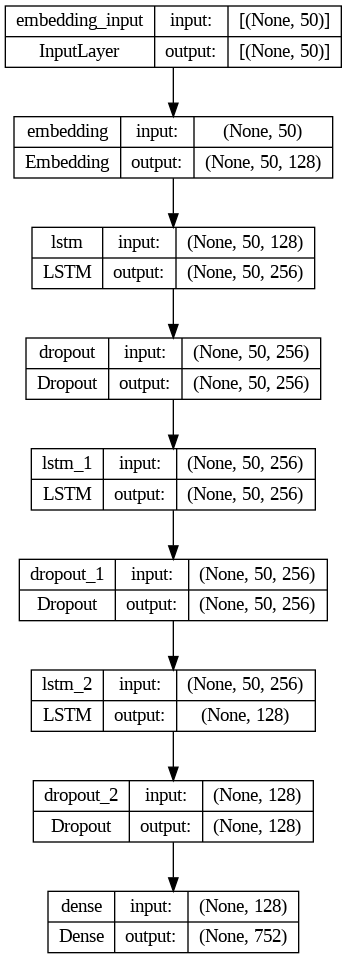

In [26]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [27]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

model.fit(predictors, label, epochs=500, verbose=1, callbacks=[early_stopping])

Epoch 1/500
322/322 [==============================] - 29s 54ms/step - loss: 5.2338
Epoch 2/500
322/322 [==============================] - 6s 18ms/step - loss: 4.7359
Epoch 3/500
322/322 [==============================] - 4s 12ms/step - loss: 4.2346
Epoch 4/500
322/322 [==============================] - 4s 14ms/step - loss: 3.9265
Epoch 5/500
322/322 [==============================] - 4s 13ms/step - loss: 3.6841
Epoch 6/500
322/322 [==============================] - 4s 11ms/step - loss: 3.5188
Epoch 7/500
322/322 [==============================] - 5s 14ms/step - loss: 3.3760
Epoch 8/500
322/322 [==============================] - 4s 12ms/step - loss: 3.2461
Epoch 9/500
322/322 [==============================] - 4s 11ms/step - loss: 3.1270
Epoch 10/500
322/322 [==============================] - 4s 13ms/step - loss: 3.0358
Epoch 11/500
322/322 [==============================] - 4s 12ms/step - loss: 2.9417
Epoch 12/500
322/322 [==============================] - 4s 12ms/step - loss: 2.8490


In [29]:
def generate_text(text, model, max_sequence_len):
    seed_text = " ".join(tokenize.word_tokenize(text))
    counter = 0
    while counter < 100:
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = model.predict(token_list, verbose=0)
        predicted = np.random.choice(np.arange(0, predicted.shape[1]), p=predicted[0])

        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " "+output_word
        if output_word == "END":
          joined_text = "".join(seed_text.split(" ")[:-1])
          return joined_text
        counter += 1
    return seed_text

In [30]:
test_text = "คุณได้"
print(generate_text(test_text, model, max_sequence_len))

คุณได้รับสินเชื่อ220000บาทคลิก


In [39]:
test_text = "SCB"
print(generate_text(test_text, model, max_sequence_len))

SCBUPเพื่อรับวงเงินดอกเบี้ยต่ำคลิ๊ก


Save Model

In [35]:
import pickle

model.save("model.h5")
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)